In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("clean_data.csv")
print(df.describe(include='object'))

C:\Users\20223760\AppData\Local\Temp\ipykernel_10152\3632040074.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clean_data.csv")


              ID Customer_ID      Month    Name Occupation   Type_of_Loan  \
count     150001      150000     150000  135000     139500         132888   
unique    150001       12500         12   10139         15           6260   
top     \n0x160a   CUS_0xd40  September  Stevex     Lawyer  Not Specified   
freq           1          12      12500      66       9899           2112   

       Changed_Credit_Limit Credit_Mix  Credit_History_Age  \
count                150000     120000              136500   
unique                 3771          3                 408   
top                       _   Standard  17Yearsand11Months   
freq                   3150      54858                 628   

       Payment_of_Min_Amount               Payment_Behaviour Credit_Score  
count                 150000                          138600       100000  
unique                     3                               6            3  
top                      Yes  Low_spent_Small_value_payments     Standard  

In [7]:
df.Age.value_counts()

39.0      4238
32.0      4233
28.0      4212
26.0      4182
35.0      4160
          ... 
4431.0       1
849.0        1
7080.0       1
5079.0       1
2263.0       1
Name: Age, Length: 2355, dtype: int64

AttributeError: 'Axes' object has no attribute 'xticks'

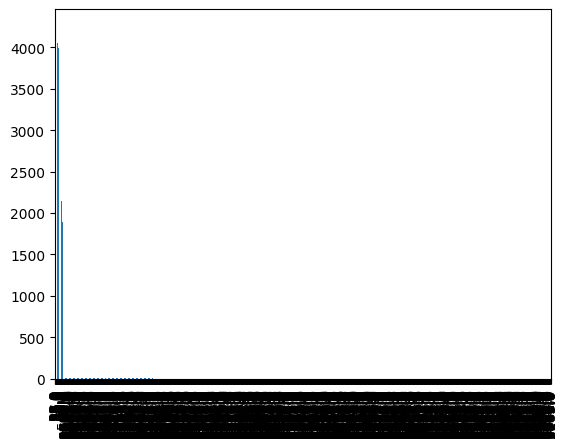

In [15]:
df.Age.value_counts().plot(kind='bar')

In [40]:
# get customer id for nan values in Name Column
customer_IDs = df[(df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)]['Customer_ID'].values

In [41]:
customer_IDs

array(['CUS_0xd40', 'CUS_0x95ee', 'CUS_0x4157', ..., 'CUS_0xf16',
       'CUS_0x8600', nan], dtype=object)

In [42]:
# get real age by customer id
for id in customer_IDs:
    realAge = 0
    try:
        realAge = df.loc[(df['Customer_ID'] == id) & (df['Age'].notna()) & (df['Age'] < 100) & (df['Age'] > 0)]['Age'].values[-1]
    except IndexError:
        continue
    # fill missing value
    df.loc[(df['Customer_ID'] == id) & ((df['Age'].isna()) | (df['Age'] > 100) | (df['Age'] < 0)), ['Age']] = realAge

<Axes: >

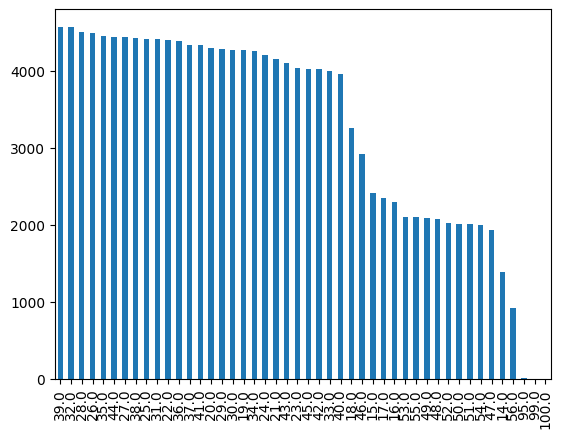

In [43]:
df.Age.value_counts().plot(kind='bar')

In [44]:
df['Annual_Income'].describe()

count    1.500000e+05
mean     1.730552e+05
std      1.404215e+06
min      7.005930e+03
25%      1.945549e+04
50%      3.757861e+04
75%      7.279690e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

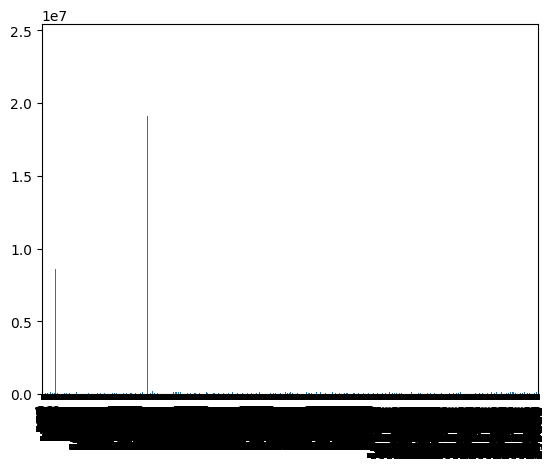

<Axes: >

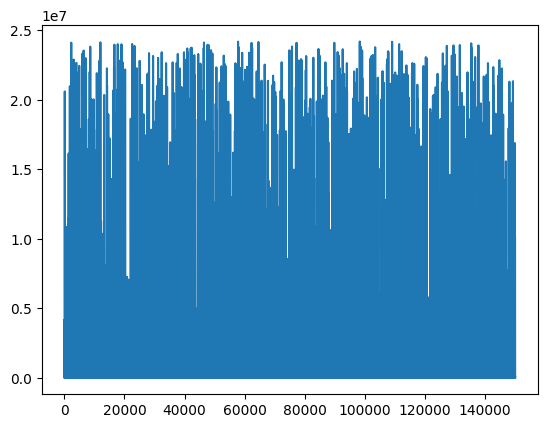

In [47]:
df.Annual_Income.plot(kind='line')